In [ ]:
%%shell
#wget https://bit.ly/3lH1hKU 
pip install bert-tensorflow

     |████████████████████████████████| 64 kB 3.6 MB/s 


In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
%%shell
#cp /content/drive/MyDrive/kaggle.json /root/.kaggle/
#kaggle datasets download -d rounakbanik/the-movies-dataset
#unzip the-movies-dataset.zip

In [ ]:
%%shell
#unzip /content/MovieSummaries.tar.gz
#7z x  /content/MovieSummaries.tar.gz
#tar -xvzf  /content/MovieSummaries.tar.gz
pip3 install transformers

     |████████████████████████████████| 4.0 MB 28.4 MB/s 
     |████████████████████████████████| 596 kB 43.6 MB/s 
     |████████████████████████████████| 6.6 MB 76.4 MB/s 
     |████████████████████████████████| 77 kB 9.0 MB/s 
     |████████████████████████████████| 895 kB 71.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import transformers

In [ ]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import nltk
import joblib

%matplotlib inline


In [ ]:
#data = pd.read_csv("movies_metadata.csv", sep = ',', header = 0, low_memory=False)
#movies = data[['title','overview','genres']].copy()
#movies.head()

In [ ]:
import pandas as pd
import numpy as np
import json
import nltk
import re
import csv
import matplotlib.pyplot as plt 
import seaborn as sns
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

%matplotlib inline


In [ ]:
file_path = '/content/drive/MyDrive/MovieSummaries/'

In [ ]:
meta = pd.read_csv(file_path+"movie.metadata.tsv", sep = '\t')
meta.head()

,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science Fiction"", ""/m/03npn"": ""Horror"", ""/m/03k9fj"": ""Adventure"", ""/m/0fdjb"": ""Supernatural"", ""/m/02kdv5l"": ""Action"", ""/m/09zvmj"": ""Space western""}"
0,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
1,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
2,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
3,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
4,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen..."


In [ ]:
# rename columns
meta.columns = ["movie_id",1,"movie_name",3,4,5,6,7,"genre"]

In [ ]:
meta.head()

,movie_id,1,movie_name,3,4,5,6,7,genre
0,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
1,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
2,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
3,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
4,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen..."


In [ ]:
import csv
from tqdm.notebook import tqdm

In [ ]:
plots = []

with open(file_path+"plot_summaries.txt", 'r') as f:
       reader = csv.reader(f, dialect='excel-tab') 
       for row in tqdm(reader):
            if len(row) < 2: continue
            plots.append(row)

0it [00:00, ?it/s]

In [ ]:
plots_df = pd.DataFrame(plots)

In [ ]:
plots_df.columns = ['movie_id','plot']

In [ ]:
# change datatype of 'movie_id'
meta['movie_id'] = meta['movie_id'].astype(str)

# merge meta with movies
movies = pd.merge(plots_df, meta[['movie_id', 'movie_name', 'genre']], on = 'movie_id')

movies.head()

,movie_id,plot,movie_name,genre
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",Taxi Blues,"{""/m/07s9rl0"": ""Drama"", ""/m/03q4nz"": ""World ci..."
1,31186339,The nation of Panem consists of a wealthy Capi...,The Hunger Games,"{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"":..."
2,20663735,Poovalli Induchoodan is sentenced for six yea...,Narasimham,"{""/m/04t36"": ""Musical"", ""/m/02kdv5l"": ""Action""..."
3,2231378,"The Lemon Drop Kid , a New York City swindler,...",The Lemon Drop Kid,"{""/m/06qm3"": ""Screwball comedy"", ""/m/01z4y"": ""..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...,A Cry in the Dark,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."


In [ ]:
gs = movies.genre.apply(json.loads)
gs = gs.apply(lambda s: s.values())

In [ ]:
movies.genre = gs

In [ ]:
# remove samples with 0 genre tags
movies_new = movies[movies.genre.apply(lambda s: len(s)!=0)].copy()
#movies_new.genre = movies_new.genre.apply(lambda s: list(s.values()))

In [ ]:
movies_new.shape, movies.shape

((41792, 4), (42203, 4))

In [ ]:
movies_new.genre.values[0]

dict_values(['Drama', 'World cinema'])

In [ ]:
from collections import Counter
sorted(Counter(all_genres).items(),key=lambda c: c[0])


In [ ]:
clusts = ( ('Animal Picture',  
 'Animals'),
 ('Anti-war', 
 'Anti-war film'), 
 ('Biographical film', 
 'Biography', 
 'Biopic [feature]'), 
 ('Comedy', 
 'Comedy film'),
 ('Coming of age', 
 'Coming-of-age film'), 
 ('Education', 
 'Educational'), 
 ('Filipino', 
 'Filipino Movies'), 
 ('Gay', 
 'Gay Interest', 
 'Gay Themed'), 
 ('Gross out', 
 'Gross-out film'), 
 ('Monster', 
 'Monster movie'), 
 ('Pornographic movie', 
 'Pornography'), 
 ('Prison', 
 'Prison film'), 
 ('Sci Fi Pictures original films', 
 'Science Fiction'), 
 ('Social issues', 
 'Social problem film'), 
 ('Superhero', 
 'Superhero movie'), 
 ('Sword and sorcery', 
 'Sword and sorcery films'), 
 ('Tamil cinema', 
 'Tollywood') )

In [ ]:
for cl in tqdm(clusts):
  movies_new.genre = movies_new.genre.apply(lambda ss: [cl[0] if s in cl else s for s in ss])

  0%|          | 0/17 [00:00<?, ?it/s]

In [ ]:
# get all genre tags in a list
all_genres = []
movies_new.genre.apply(all_genres.extend)
len(set(all_genres))

344

In [ ]:
all_genres = nltk.FreqDist(all_genres) 

# create dataframe
all_genres_df = pd.DataFrame({'Genre': list(all_genres.keys()), 
                              'Count': list(all_genres.values())})

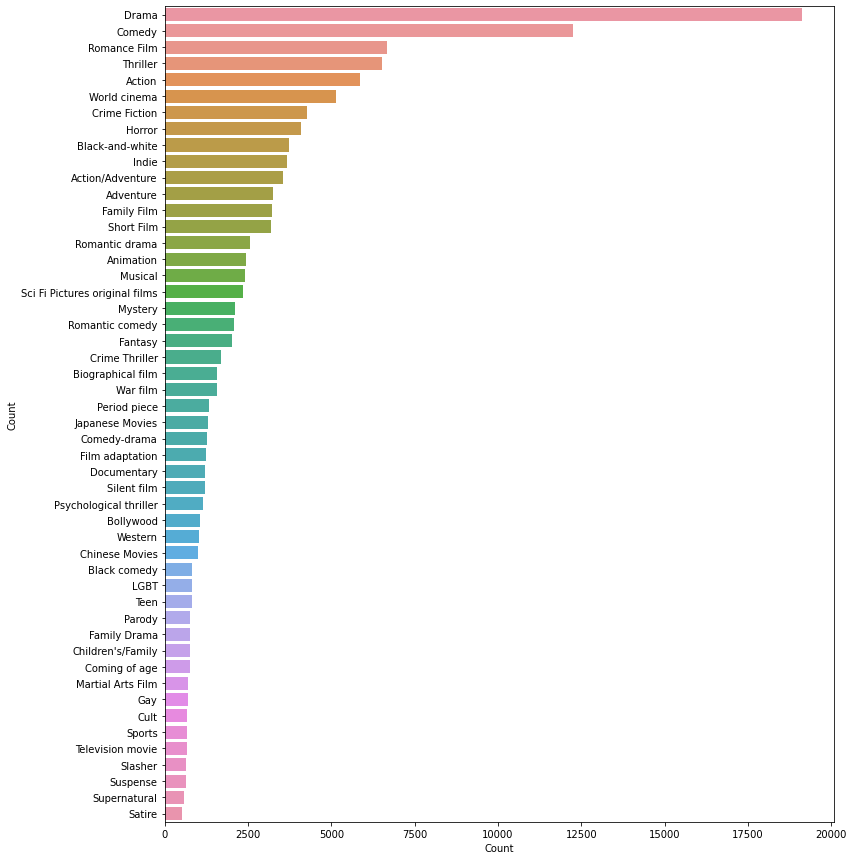

In [ ]:
g = all_genres_df.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=g, x= "Count", y = "Genre") 
ax.set(ylabel = 'Count') 
plt.show()

In [ ]:
nltk.download('stopwords')

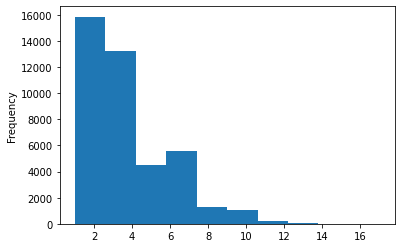

In [ ]:
movies_new.genre.apply(len).plot(kind='hist')

In [ ]:
train = movies_new[['plot','genre']].dropna()

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()


In [ ]:
from pickle import dump,load
try:
  mlb = load(open(file_path+'label_binarizer.pkl', 'rb'))
except:
  mlb = mlb.fit(train.genre.values)

In [ ]:
train.head()

,plot,genre
0,"Shlykov, a hard-working taxi driver and Lyosha...","[Drama, World cinema]"
1,The nation of Panem consists of a wealthy Capi...,"[Action/Adventure, Sci Fi Pictures original fi..."
2,Poovalli Induchoodan is sentenced for six yea...,"[Musical, Action, Drama, Bollywood]"
3,"The Lemon Drop Kid , a New York City swindler,...","[Screwball comedy, Comedy]"
4,Seventh-day Adventist Church pastor Michael Ch...,"[Crime Fiction, Drama, Docudrama, World cinema..."


In [ ]:
#train.genre = train.genre.apply(lambda l: list(l)[0])
train.head()

,plot,genre
0,"Shlykov, a hard-working taxi driver and Lyosha...","[Drama, World cinema]"
1,The nation of Panem consists of a wealthy Capi...,"[Action/Adventure, Sci Fi Pictures original fi..."
2,Poovalli Induchoodan is sentenced for six yea...,"[Musical, Action, Drama, Bollywood]"
3,"The Lemon Drop Kid , a New York City swindler,...","[Screwball comedy, Comedy]"
4,Seventh-day Adventist Church pastor Michael Ch...,"[Crime Fiction, Drama, Docudrama, World cinema..."


In [ ]:
train['og_genres'] = train.genre

train.genre = train.genre.apply(lambda s: mlb.transform([s]))


In [ ]:
train.genre =train.genre.apply(lambda s: s.flatten())


In [ ]:
# function for text cleaning 
def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

In [ ]:
train['clean_plot'] = train['plot'].apply(lambda x: clean_text(x))

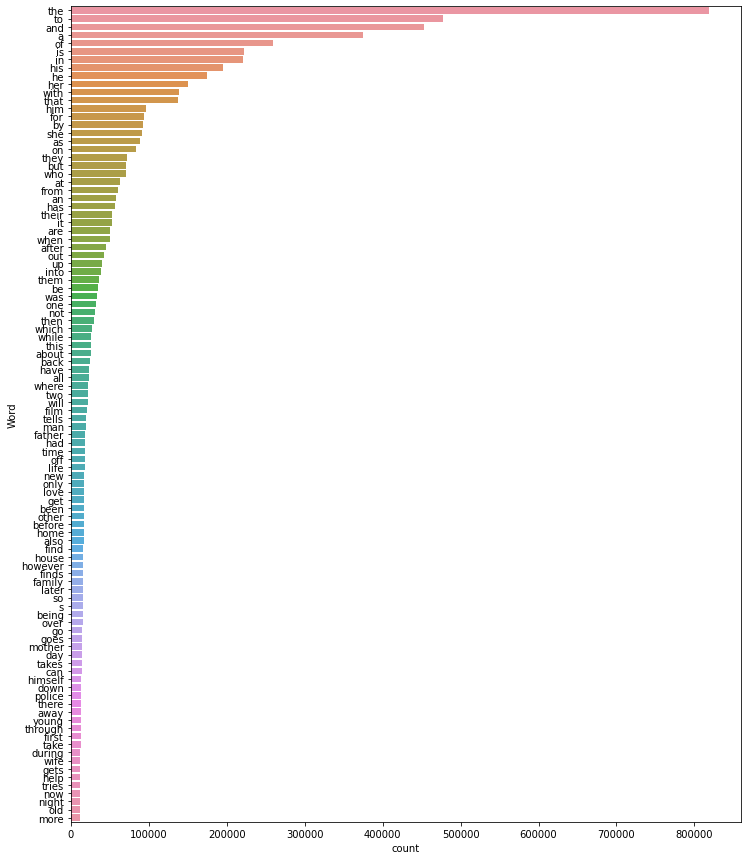

In [ ]:
def freq_words(x, terms = 30): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # selecting top 20 most frequent words 
  d = words_df.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
  plt.figure(figsize=(12,15)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show()
  
# print 100 most frequent words 
freq_words(train['clean_plot'], 100)

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

train['clean_plot'] = train['clean_plot'].apply(lambda x: remove_stopwords(x))

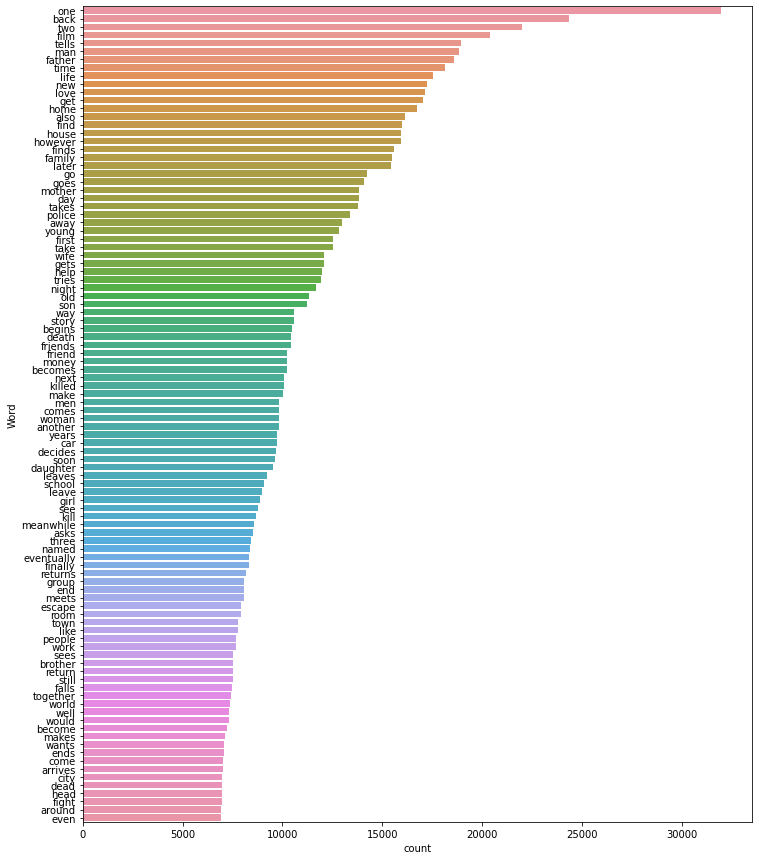

In [ ]:
freq_words(train['clean_plot'], 100)

In [ ]:
y = np.vstack(train['genre'].values)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)

In [ ]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# split dataset into training and validation set
xtrain, xval, ytrain, yval = train_test_split(train['clean_plot'], y, test_size=0.26, random_state=9)
xtest, xval, ytest, yval = train_test_split(xval, yval, test_size=0.25, random_state=9)

In [ ]:
vectorizer =TfidfVectorizer(min_df=10,ngram_range=(1,3), max_features=20000)
xtrain_multilabel1 = vectorizer.fit_transform(xtrain)
xval_multilabel1 = vectorizer.transform(xval)
xtest_multilabel1 = vectorizer.transform(xtest)

print("Dimensions of train data X:",xtrain_multilabel1.shape, "Y :",ytrain.shape)
print("Dimensions of val data X:",xval_multilabel1.shape, "Y :",yval.shape)
print("Dimensions of test data X:",xtest_multilabel1.shape,"Y:",ytest.shape)


Dimensions of train data X: (30926, 20000) Y : (30926, 344)
Dimensions of val data X: (2717, 20000) Y : (2717, 344)
Dimensions of test data X: (8149, 20000) Y: (8149, 344)


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
lda=LatentDirichletAllocation()
tr2=lda.fit_transform(xtrain_multilabel1)
test2=lda.transform(xtest_multilabel1)

In [ ]:
from datetime import datetime

In [ ]:
(((ytrain.mean(axis=0)-1))==0).sum(),ytrain.mean(axis=0).shape

(0, (344,))

In [ ]:
from sklearn.multiclass import *#OneVsRestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import  *
start = datetime.now()
alpha=[0.001,0.01,0.1,1,10]
for i in alpha:
    classifier_1 = OneVsRestClassifier(BernoulliNB(alpha=i))
    classifier_1.fit(xtrain_multilabel1, ytrain)
    predictions_1 = classifier_1.predict(xtrain_multilabel1)
    predictions_2 = classifier_1.predict(xval_multilabel1)
    f1 = f1_score(ytrain, predictions_1, average='micro')
    f2 = f1_score(yval, predictions_2, average='micro')
    print("Micro-average quality numbers for C=",i)
    print(" F1-measure for train: {:.4f}".format( f1))
    print(" F1-measure for val: {:.4f}".format( f2))
print("Time taken to run this cell :", datetime.now() - start)


/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 34 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 44 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 70 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 147 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 171 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/pyt

Micro-average quality numbers for C= 0.001
 F1-measure for train: 0.5136
 F1-measure for val: 0.3458


/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 34 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 44 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 70 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 147 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 171 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/pyt

Micro-average quality numbers for C= 0.01
 F1-measure for train: 0.4620
 F1-measure for val: 0.3232


/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 34 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 44 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 70 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 147 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 171 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/pyt

Micro-average quality numbers for C= 0.1
 F1-measure for train: 0.3652
 F1-measure for val: 0.2827


/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 34 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 44 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 70 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 147 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 171 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/pyt

Micro-average quality numbers for C= 1
 F1-measure for train: 0.2190
 F1-measure for val: 0.1974


/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 34 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 44 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 70 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 147 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 171 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/pyt

Micro-average quality numbers for C= 10
 F1-measure for train: 0.2640
 F1-measure for val: 0.2519
Time taken to run this cell : 0:03:26.567832


In [ ]:
import sklearn

In [ ]:
start = datetime.now()
alpha=[0.01,0.1,1,10]
for j in alpha:
    classifier_1 = OneVsRestClassifier(sklearn.linear_model.LogisticRegression(C=j,solver='saga',penalty='l1',tol=0.001))
    classifier_1.fit(xtrain_multilabel1, ytrain)
    ypred_prob = classifier_1.predict_proba(xtrain_multilabel1)
    i=0.2
    predictions_1 = (ypred_prob >= i).astype(int)
    ypred_probc = classifier_1.predict_proba(xval_multilabel1)
 
    predictions_2 = (ypred_probc >= i).astype(int)
    
    f1 = f1_score(ytrain, predictions_1, average='micro')
    f2 = f1_score(yval, predictions_2, average='micro')
    print("Micro-average quality numbers for C=",j)
    print(" F1-measure for train: {:.4f}".format( f1))
    print(" F1-measure for val: {:.4f}".format( f2))
print("Time taken to run this cell :", datetime.now() - start)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [ ]:
# I am keeping same hyperparameter which i got after tuning above
classifier_1 = OneVsRestClassifier(sklearn.linear_model.LogisticRegression(C=1,penalty='l2',tol=0.001))
classifier_1.fit(xtrain_multilabel1, ytrain)
yprobtr= classifier_1.predict_proba(xtrain_multilabel1)
ypred_prob = classifier_1.predict_proba(xtest_multilabel1 )
i=0.2 
ypredtr = (yprobtr >= i).astype(int)
ypred_new = (ypred_prob >= i).astype(int)
f1 = f1_score(ytrain,ypredtr, average='micro')
f2 = f1_score(ytest, ypred_new, average='micro')
print("Micro-average quality numbers for C=1 and threshold=",i)
print(" F1-measure for test: {:.4f}".format( f1))
print(" F1-measure for test: {:.4f}".format( f2))


In [ ]:
from tensorflow.keras.layers import *
import tensorflow as tf

In [ ]:
embedding_vecor_length = 300
MAX_SEQ_LENGTH = 512
model_1 = tf.keras.Sequential()
model_1.add(Embedding(13780+1, embedding_vecor_length, input_length=MAX_SEQ_LENGTH))
model_1.add(LSTM(128))
model_1.add(Dense(len(set(all_genres)), activation='sigmoid'))

loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)

model_1.compile(loss=loss, optimizer='adam', metrics=['accuracy'])


In [ ]:
model_1.fit(xtrain_multilabel1.toarray(), ytrain, epochs=5, batch_size=512,validation_data=(xval_multilabel1.toarray(),yval))
